## Сборный проект ##

Документация:

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


В этом проекте мы рассмотрим интернет-магазин «Стримчик» который продают игры на все платформы и по всему миру, в этом проекте мы будем готовиться в большой компании следующего года

Цель иследования: 

В этом проекте мы попробуем найти какие факторы будут влиять на проажи в 2017 году и попробуем сделать какие нибудь предположения на 2017 год. 

1 Для начала разгрузим данные которые нам дали в них входит один файл

2 После чего сделаем предобработку данных и проверим данныхе на наличие дубликатов или отсутвствие данных

3 Проведем исследовательский анализ данных а именно проверим некоторые отфильтрованные значения и посмотрим данные для вывода 2017 года

4 Составим портрет пользователя каждого региона а также визуализируем и сравним их между собой, выстроим несколько сравнительных таблиц. 

5 Проведем гипотезы (проведем две основные гипотезы с помощью которых ответим на основные вопросы а также подробно расспишем как и что применяя мы пришли к такому выводу

<font color='DarkBlue'><b>Комментарий ревьюера 0</b></font><br>
<font color='DarkGreen'>👌 Хорошо, сделано описание проекта. 👍</font>

**Шаг№1 Выгрузка данных**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/games.csv')
display(data)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Шаг№2 Просмотр данных**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Предобработка данных**
В этом шаге мы будем предобрабатывать данные и убирать дубликаты и также проверим причины отсутсвия данных в некоторых столбцах


In [5]:
data = data.rename(columns={
    'Name':'name',
    'Platform':'platform',
    'Year_of_Release':'year_of_release',
    'Genre':'genre',
    'Other_sales':'other_sales',
    'Critic_Score':'critic_score',
    'User_Score':'user_score',
    'Rating':'rating'
})
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

перевели все в нижний регистр

In [6]:
duplicateRows = data[data.duplicated()]
duplicateRows

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating


дубликатов по строкам нет

In [7]:
data.duplicated().sum()

0

явных дубликатов так же нет

In [8]:
duplicateRowss = data[data.duplicated(['name', 'platform', 'year_of_release'])]
duplicateRowss


,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


In [9]:
data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='last')

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [10]:
data['user_score'] = data['user_score'].replace('tbd', '-1')
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '-1', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
data['rating'] = data['rating'].fillna('-1')
data['rating'].unique()

array(['E', '-1', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

также поставим заглушки в столбце rating

переводим значение tbd(to be determined) в нулевое значение так как таких значений свыше 2000 и лучше будет заполнить их нулевым.

In [12]:
data['user_score'] = data['user_score'].astype('float')
data['user_score'].isna().sum()

6701

пока не будем трогать пусные значения но уберем их при выполнении гипотиз

переводим значение в float тип данных.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [14]:
data = data.dropna(subset = ['year_of_release'])
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

удаляем ячейки с отсутсвущими данными по столбцу года так как их не много и значительных изменений после удаления не будет

In [15]:
data['year_of_release'] = data['year_of_release'].astype('int')
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

Переводим в тип данных с целочисленный так как это года и их лучше рассматривать в виде целых чисел

In [16]:
data = data.dropna(subset = ['name'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   NA_sales         16444 non-null  float64
 5   EU_sales         16444 non-null  float64
 6   JP_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [17]:
data['total_sales'] = data['NA_sales'] + data['EU_sales'] + data['JP_sales'] + data['other_sales']
display(data)

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,-1,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,-1,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,-1,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,-1,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,-1,0.01


Добавляем еще один столбец с общей суммой всех продах по всем регионам

Если мы рассмотрим пропуски оценки пользователей то не все предпочитают ставить оценку игре, что касается оценки критиков то по большей части они еще не опубликовали оценку. И точно такая же ситуация как и с оценкой критиков рейтинг ESRB, по большей части ее еще не опубликовали или на тот момент ее еще не существовало. Могут также также смущать нулевые продажи по регионам у некоторых игр но этот вопрос будет все еще открыт так как мы не можем точно сказать что там и в правду не было продаж или просто не добавили данные по продажам. А так же пропуски в отзывах могли появиться, потому что продажи игры были низкие и не набралось необходимого количества индивидуальных отзывов для получения итоговой оценки. А так же, игра получила региональный возрастной рейтинг, а не северо-американский ESRB.

In [18]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   NA_sales         16444 non-null  float64
 5   EU_sales         16444 non-null  float64
 6   JP_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

Сделал этот выше где поставил заглушки в столбце user_score

Создадим датафрейм c актуальным периодом 

In [19]:
data_year = data[data['year_of_release'] > 2013]

**Шаг№3 Проводим иследовотельский анализ данных**

На этом этапе мы сделаем:
Просмотрим как менчлись продажи за определенный период времени и также рассмотрим корреляцию между двумя значениями. Также просмотрим от чего зависили продажи в том или ином регионе и общие зависимости продаж от оценки пользователей и критиков а также рейтинга ESRB

Сделал для каждой секции шаги и подпункты в которых объясняется что будет сделано а также маленькие выводны по каждым подпунктам

**1)** Просмотрим как по годам выпускались игры

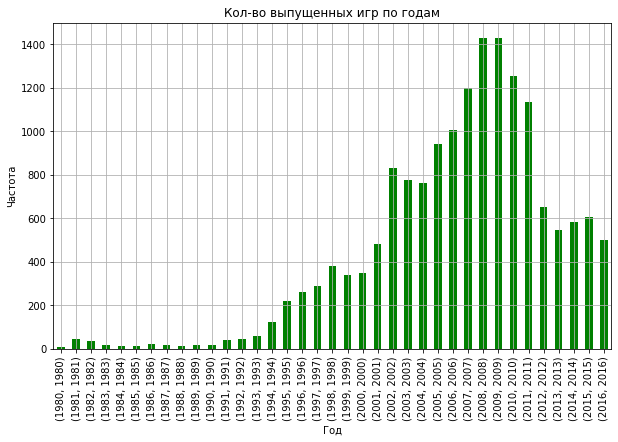

In [20]:
year_group = data.groupby('year_of_release')['year_of_release'].value_counts(ascending = True).plot(y='city', kind = 'bar', figsize = (10, 6),grid = True,color = 'green', title = 'Кол-во выпущенных игр по годам')
plt.ylabel('Частота') 
plt.xlabel('Год')
plt.show()


Взяли за счет кол-во городов так как в целом отличия не имеет. Можем Видеть что в период с 2006 по 2011 было выпущенно больше всего игры. При этом очень странно что после 2011 года резко падает кол-во выпущенных игр. А также можем заметить что еще с 1980 по 1990 практиески не выпускали новые игры. 

В этом шаге мы рассмотрим продажи по платформам и также по годам и выстроим график чтобы наглядно рассмотреть разницу в продажах.

In [21]:
ss = data.groupby(['platform', 'year_of_release'], as_index = False)['total_sales'].sum().sort_values(by = 'total_sales', ascending = False)
display(ss.head(15))



,platform,year_of_release,total_sales
134,PS2,2004,211.81
200,Wii,2009,206.97
132,PS2,2002,205.38
133,PS2,2003,184.31
199,Wii,2008,171.32
218,X360,2010,170.03
124,PS,1998,169.49
131,PS2,2001,166.43
135,PS2,2005,160.66
147,PS3,2011,156.78


platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

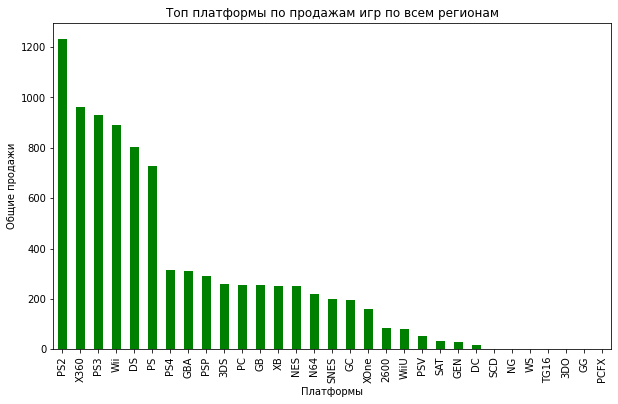

In [22]:
platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
display(platform_sales)
platform_sales.plot(kind = 'bar', figsize = (10, 6), color = 'green')
plt.title('Топ платформы по продажам игр по всем регионам')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.show()


Здесь мы можем видеть явное преимущество платформы PS2 у которой продажи на свыше 1.2 миллиарда долларов. После чего идут X360, PS3, Wii DS, PS со средними продажами в 800 млн долларов, после чего видим сильный спад начиная с платформы PS4. 

**2)** В этом шаге рассмотрим как менялись продажи по платформам

In [23]:
top_platform = platform_sales.head(18)

Здесь мы выделили топ 18 платформ по продажам чтобы работать только с ними

In [24]:
selected_platform_data = data[data['platform'].isin(top_platform.index)]

сверили их с общими данными чтобы взять продажи по общим значениям. 

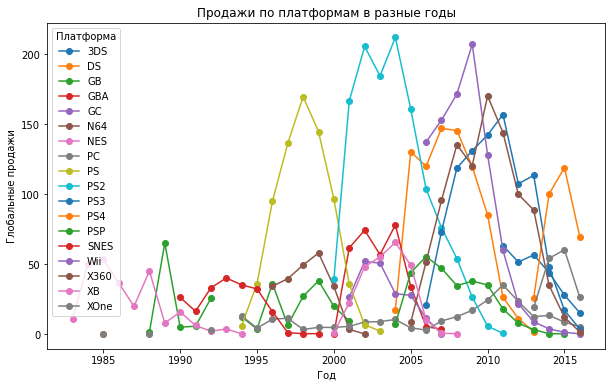

In [25]:
platforms_by_year = selected_platform_data.groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack().T
platforms_by_year.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Продажи по платформам в разные годы')
plt.xlabel('Год')
plt.ylabel('Глобальные продажи')
plt.legend(title='Платформа', loc='upper left')
plt.show()


Теперь визуализируем используя гистограмму платформы и их продажи по годам

Мы можем заметить что по большей части игровой бум начался с 2000 года по 2010 потом снижение до 2012 после чего начались спады а также легкий подъем в период с 1995 по 2000. Также средний период по продажам одной игры равен +- 10 лет

In [26]:
# Комментарий ревьюера
temp = data.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()



7.0

**3)** В этом шаге мы рассмотрим продажи по платформам за актуальный период (2014-2016) чтобы предположить какие платформы будут актуальны в след. году и мы сможем сделать упор на них

In [27]:
gg = data_year.groupby(['platform', 'year_of_release'], as_index=True)['total_sales'].sum()
gg = gg.sort_values()
display(gg)

platform  year_of_release
PSP       2015                 0.12
Wii       2016                 0.18
PSP       2014                 0.24
Wii       2015                 1.14
X360      2016                 1.52
PS3       2016                 3.60
Wii       2014                 3.75
PSV       2016                 4.25
WiiU      2016                 4.60
PC        2016                 5.25
PSV       2015                 6.25
PC        2015                 8.52
PSV       2014                11.90
X360      2015                11.96
PC        2014                13.28
3DS       2016                15.14
WiiU      2015                16.35
PS3       2015                16.82
WiiU      2014                22.03
XOne      2016                26.15
3DS       2015                27.78
X360      2014                34.74
3DS       2014                43.76
PS3       2014                47.76
XOne      2014                54.07
          2015                60.14
PS4       2016                69.25
  

создал датафрейм data_year в котором берется период с 2014 по 2016 года (3года)

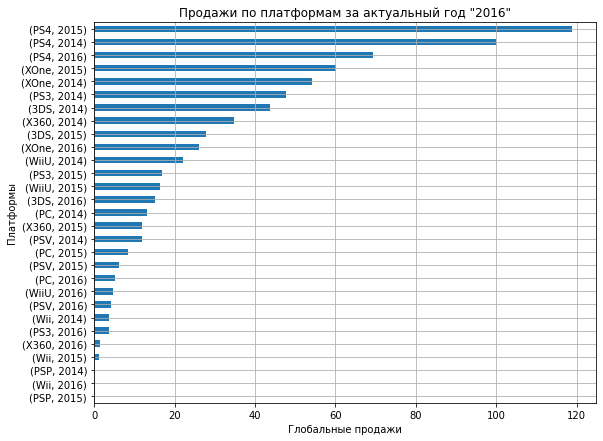

In [28]:
gg.plot(kind = 'barh', grid = True, figsize = (9, 7))
plt.title('Продажи по платформам за актуальный год "2016"')
plt.xlabel('Глобальные продажи')
plt.ylabel('Платформы')
plt.show()

Понял, принял

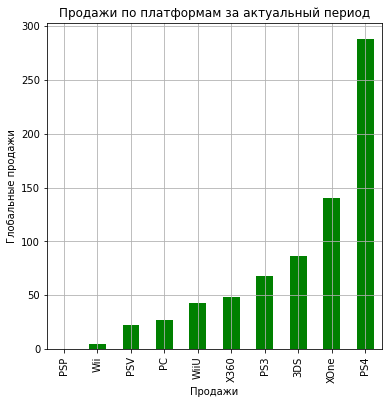

In [29]:
ww = data_year.groupby('platform', as_index=True)['total_sales'].sum()
ww = ww.sort_values()
ww.plot(kind = 'bar', figsize = (6, 6), color = 'green', grid = True)
plt.title('Продажи по платформам за актуальный период')
plt.xlabel('Продажи')
plt.ylabel('Глобальные продажи')
plt.show()

Если брать периодами то лучше всего себя показывает PS4 с общими продажами за 3 года порядка 288 млн долларов, после чего идет XOne с продажами за актуальный период порядка 135 млн долларов после чего идет платформа 3DS, PS3 и X360 которые показывают почти одиковые значения. 

**4)** Рассмотрим какие платформы самые прибыльные и перспективные и больше всего прибыль за последние года

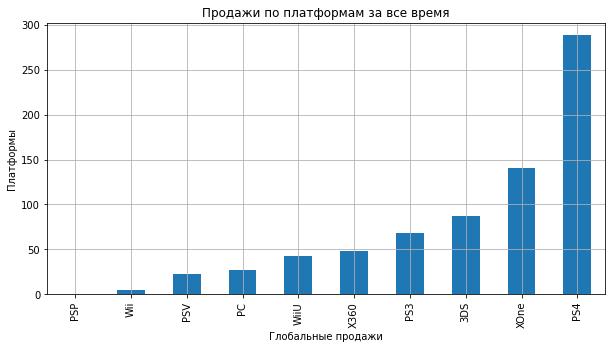

In [30]:
ss = data_year.groupby('platform', as_index=True)['total_sales'].sum()
ss = ss.sort_values()
ss.plot(kind = 'bar', grid = True, figsize = (10, 5))
plt.title('Продажи по платформам за все время')
plt.xlabel('Глобальные продажи')
plt.ylabel('Платформы')
plt.show()

In [31]:
dd = data.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')

Если мы посмотрим на платформы которые были прибыльны на протяжении всего периода и за последий год, можем заметить что есть платформы такие как PS у которых каждая новая версия платформы приносит хорошую прибыль относительно конкурирующих платформ а также выделяется платформа X360 и XOne, что тяжело сказать про платформу Wii

**5)** Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Мы также рассмотрим все показатели по топ 6 платформам и визуализируем эти показатели 

In [32]:
# Комментарий ревьюера 2
data.year_of_release.min()

1980

Понял, принял

(0.0, 1.0)

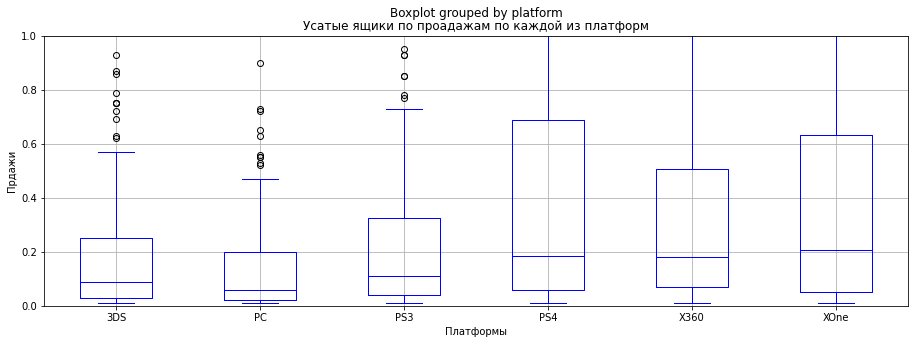

In [33]:
data_box = data_year[data_year['platform'].isin(['PS4', 'PS3', 'X360', 'XOne', '3DS', 'PC'])]
data_box.boxplot('total_sales', by = 'platform', figsize = (15,5), color = 'blue')
plt.title('Усатые ящики по проадажам по каждой из платформ')
plt.xlabel('Платформы')
plt.ylabel('Прдажи')
plt.ylim(0,1)

Можем стразу заметить как выделяется две платформы это PS4 и XOne с медианным значением в районе 200.000 долларов за актуальный период. У трех платформ (PS4, X360, XOne) медианное значение продаж примерно равно и равняется 200.000 долларов но при этом кварталы с большой разницой отличаются друг от друга. Можем видеть что стандартное отклонение у PS4 самое большое что говорит нам о том что продажи у них менее стабильные чем например у X360, XOne. При этом самые стабильные продажи у PC но это скорее потому что у PC очень низкие показатели продаж и в целом кол-во продаж очень низкое

In [34]:
print('Описание усатого ящика платформы PS3')
ps3_sales = data_box[data_box['platform'] == 'PS3']
ps3_sales['total_sales'].describe()

Описание усатого ящика платформы PS3


count    219.000000
mean       0.311324
std        0.633059
min        0.010000
25%        0.040000
50%        0.110000
75%        0.325000
max        5.270000
Name: total_sales, dtype: float64

In [35]:
print('Описание усатого ящика платформы PS4')
ps4_sales = data_box[data_box['platform'] == 'PS4']
ps4_sales['total_sales'].describe()

Описание усатого ящика платформы PS4


count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: total_sales, dtype: float64

In [36]:
print('Описание усатого ящика платформы X360')
x360_sales = data_box[data_box['platform'] == 'X360']
x360_sales['total_sales'].describe()

Описание усатого ящика платформы X360


count    111.000000
mean       0.434414
std        0.628967
min        0.010000
25%        0.070000
50%        0.180000
75%        0.505000
max        4.280000
Name: total_sales, dtype: float64

In [37]:
print('Описание усатого ящика платформы XOne')
xone_sales = data_box[data_box['platform'] == 'XOne']
xone_sales['total_sales'].describe()

Описание усатого ящика платформы XOne


count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: total_sales, dtype: float64

In [38]:
print('Описание усатого ящика платформы 3DS')
ds_sales = data_box[data_box['platform'] == '3DS']
ds_sales['total_sales'].describe()

Описание усатого ящика платформы 3DS


count    212.000000
mean       0.408868
std        1.188368
min        0.010000
25%        0.030000
50%        0.090000
75%        0.250000
max       11.680000
Name: total_sales, dtype: float64

In [39]:
print('Описание усатого ящика платформы PC')
pc_sales = data_box[data_box['platform'] == 'PC']
pc_sales['total_sales'].describe()

Описание усатого ящика платформы PC


count    151.000000
mean       0.179139
std        0.329359
min        0.010000
25%        0.020000
50%        0.060000
75%        0.200000
max        3.050000
Name: total_sales, dtype: float64

Можем увидеть что медианное значение из продаж PS4 и XOne примерно 200.000 долларов но при этом кварталы усатых ящиков сильно отличаюся и можно заметить сильную разницу например мержду Q1 и Q3 у PS4 и 3DS и можем увидеть что есть сильная разница между продажами например у того что PS4 продажи от 60.000 долларов до 740.000 долларов в то время как у 3DS продажи от 10.000 до 250.000. Можем также заметить не сильную разницу между 4 платформами такие как PS3, PS4, X360, XOne относительно двух других платформ 3DS, PC можем заметить относительно низкие продажи на платформе PC

**6)** Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

В первую очередь мы рассмотрим корреляцию между продажами и отзывами клиентов после чего просмотрим корреляцию между продажами и отзывами критиков

В этом пункте мы отделим 4 популярных платформ для отдельного подсчета и визуализации

Сделано 

In [40]:
PS4_sales = data_year.query('platform =="PS4"')
PS3_sales = data_year.query('platform =="PS3"')
X360_sales = data_year.query('platform =="X360"')
XOne_sales = data_year.query('platform =="XOne"')

Корреляция между отзывами и продажами PS4
0.024999177810042086
Корреляция между отзывами и продажами PS3
0.13333687207290473
Корреляция между отзывами и продажами X360
0.03551709838374137
Корреляция между отзывами и продажами XOne
0.08638437601040448


Text(0, 0.5, 'Общие продажи')

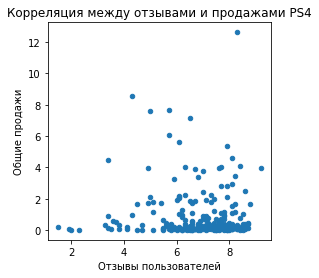

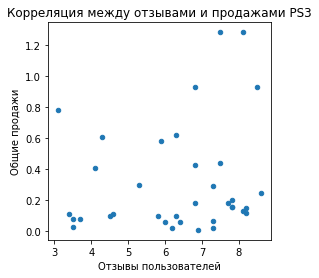

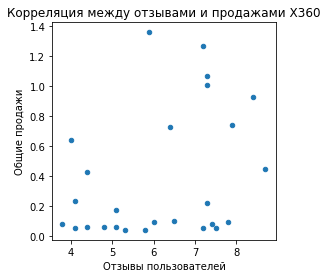

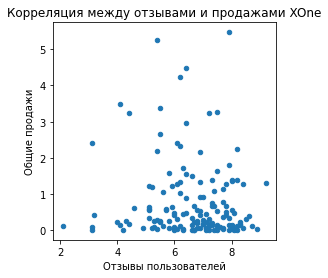

In [41]:
print('Корреляция между отзывами и продажами PS4')
print(PS4_sales['user_score'].corr(PS4_sales['total_sales']))
print('Корреляция между отзывами и продажами PS3')
print(PS3_sales['user_score'].corr(PS3_sales['total_sales']))
print('Корреляция между отзывами и продажами X360')
print(X360_sales['user_score'].corr(X360_sales['total_sales']))
print('Корреляция между отзывами и продажами XOne')
print(XOne_sales['user_score'].corr(XOne_sales['total_sales']))
PS4_sales = PS4_sales.dropna()
PS4_sales = PS4_sales.query('user_score > 0')
PS3_sales = PS3_sales.dropna()
X360_sales = X360_sales.dropna()
XOne_sales = XOne_sales.dropna()
XOne_sales = XOne_sales.query('user_score > 0')
PS4_sales.plot(kind = 'scatter', x = 'user_score', y = 'total_sales', figsize = (4,4), title = 'Корреляция между отзывами и продажами PS4')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Общие продажи')
PS3_sales.plot(kind = 'scatter', x = 'user_score', y = 'total_sales', figsize = (4,4), title = 'Корреляция между отзывами и продажами PS3')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Общие продажи')
X360_sales.plot(kind = 'scatter', x = 'user_score', y = 'total_sales', figsize = (4,4), title = 'Корреляция между отзывами и продажами X360')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Общие продажи')
XOne_sales.plot(kind = 'scatter', x = 'user_score', y = 'total_sales', figsize = (4,4), title = 'Корреляция между отзывами и продажами XOne')
plt.xlabel('Отзывы пользователей')
plt.ylabel('Общие продажи')



**Вывод:** В целом можем видеть очень слабую корреляцию между отзывами клиентов и продаж. Это говорит нам о том что оценка пользователей никак не влияет на продажи той или иной игры.

Убрал заполнение пропусков медианным значением

В этом шаге мы рассмотрим как оценка критика влияет на продажи игры по топ-4 платформам 

Корреляция между отзывами и продажами PS4
0.40190287811475334
Корреляция между отзывами и продажами PS3
0.44657460493190704
Корреляция между отзывами и продажами X360
0.5257228356581523
Корреляция между отзывами и продажами XOne
0.42211185105557647


Text(0, 0.5, 'Общие продажи')

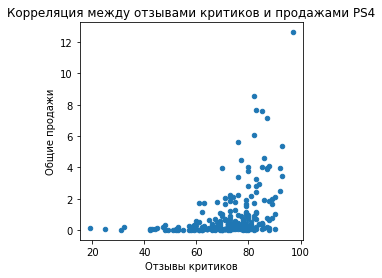

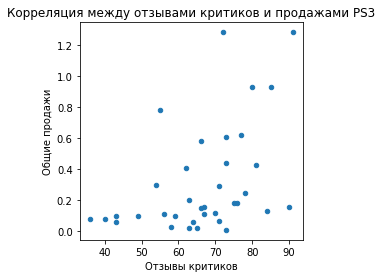

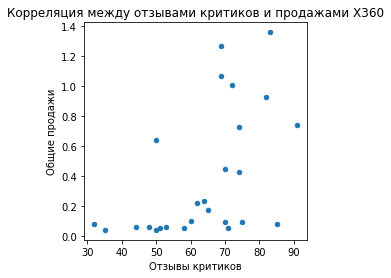

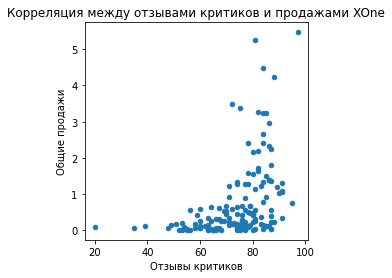

In [42]:
print('Корреляция между отзывами и продажами PS4')
print(PS4_sales['critic_score'].corr(PS4_sales['total_sales']))
print('Корреляция между отзывами и продажами PS3')
print(PS3_sales['critic_score'].corr(PS3_sales['total_sales']))
print('Корреляция между отзывами и продажами X360')
print(X360_sales['critic_score'].corr(X360_sales['total_sales']))
print('Корреляция между отзывами и продажами XOne')
print(XOne_sales['critic_score'].corr(XOne_sales['total_sales']))
PS4_sales.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', figsize = (4,4), title = 'Корреляция между отзывами критиков и продажами PS4')
plt.xlabel('Отзывы критиков')
plt.ylabel('Общие продажи')
PS3_sales.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', figsize = (4,4), title = 'Корреляция между отзывами критиков и продажами PS3')
plt.xlabel('Отзывы критиков')
plt.ylabel('Общие продажи')
X360_sales.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', figsize = (4,4), title = 'Корреляция между отзывами критиков и продажами X360')
plt.xlabel('Отзывы критиков')
plt.ylabel('Общие продажи')
XOne_sales.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales', figsize = (4,4), title = 'Корреляция между отзывами критиков и продажами XOne')
plt.xlabel('Отзывы критиков')
plt.ylabel('Общие продажи')


Можем увидеть что есть разница между отзывами самих пользователей и критиков. Отзывы пользователей не сильно реагируют на продажи в то время как отзывы критиков дают свою долю влияния на продажи хоть и все еще не сильное так как средняя корреляция равна 0.4. Можем увидеть не вооруженным взглядом на примере платформы PS3 выресовывается линия которая говорит нам о том что есть связь между продажами и оценкой критика

**7)** Посмотрим на общее распределение игр по жанрам.

Здесь мы посчитаем общие продажи по жанрам и также визуализируем для более ясной картины продаж по жанрам и определим самые выгодные жанры игр

genre
Adventure       0.030
Puzzle          0.045
Strategy        0.060
Action          0.090
Misc            0.090
Racing          0.090
Simulation      0.100
Role-Playing    0.110
Fighting        0.125
Platform        0.140
Sports          0.180
Shooter         0.515
Name: total_sales, dtype: float64

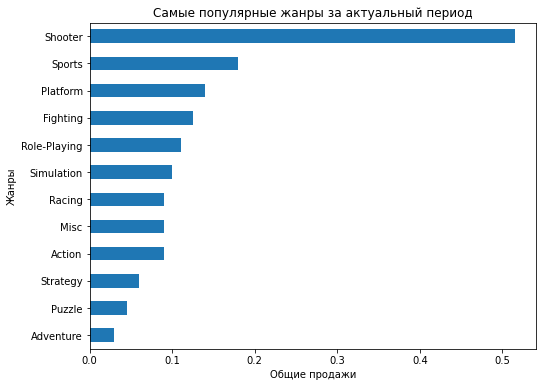

In [43]:
genre_sales = data_year.groupby('genre')['total_sales'].median().sort_values()
genre_sales.plot(kind = 'barh', figsize = (8, 6))
plt.title('Самые популярные жанры за актуальный период')
plt.xlabel('Общие продажи')
plt.ylabel('Жанры')
display(genre_sales)

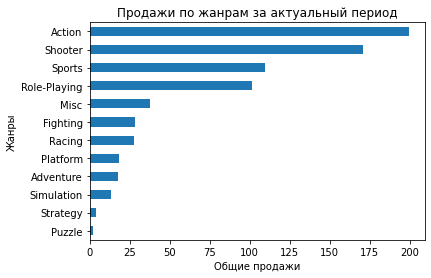

In [44]:
data_year.groupby('genre')['total_sales'].sum().sort_values().plot(kind = 'barh')
plt.title('Продажи по жанрам за актуальный период')
plt.xlabel('Общие продажи')
plt.ylabel('Жанры')
plt.show()

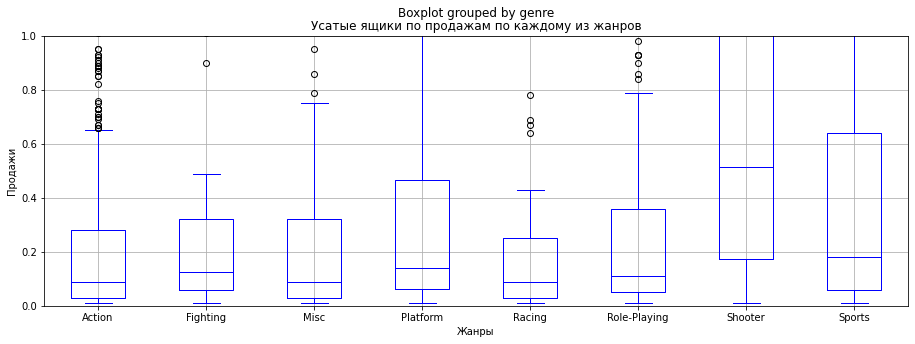

In [45]:
genre_sales = data_year[data_year['genre'].isin(['Platform', 'Shooter', 'Sports', 'Fighting', 'Racing', 'Action', 'Role-Playing', 'Misc'])]
genre_sales.boxplot('total_sales', by = 'genre', figsize = (15,5), color = 'blue')
plt.title('Усатые ящики по продажам по каждому из жанров')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.ylim(0,1)
plt.show()

В этом случае мы будем смотреть на жанры по медианным значениям так как они более устойчевые: 

Мы можем видеть что самый прибыльный жанр в долгий срок и более стабильный является Шутеры с медианным значением 550.000 долларов, после чего идет Спорт с медианным значением 190.000 долларов, после чего идет жанр Платформер, на 4 месте жанр схватки (драки) и с практически равными значениям на 5 и 6 месте стоят жанры Role-Playing, Simulation

**Составим портрет пользователя каждого региона**

Рассмотрим какие самые популярные платформы и также жанры после чего посмотрим как рейтинг ESRB влияет на продажи по регионам

Еще раз посмотрим на общие данные чтобы точно понимать какие столбцы нам будут нужны 

In [46]:
display(data)

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,-1,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,-1,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,-1,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,-1,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,-1,0.01


**1)** Самые популярные платформы

In [47]:
NA_sales = data_year.query('NA_sales > 0')
EU_sales = data_year.query('EU_sales > 0')
JP_sales = data_year.query('JP_sales > 0')

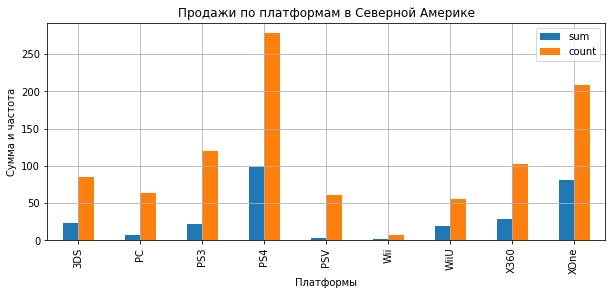

In [48]:
NA_sales.groupby('platform')['NA_sales'].agg(['sum', 'count']).plot(kind = 'bar', figsize = (10,4), grid = True)
plt.title('Продажи по платформам в Северной Америке')
plt.xlabel('Платформы')
plt.ylabel('Сумма и частота')
plt.show()

Здесь мы можем выделить 6 основных платформ в которые входит линейка PS кроме PS4, Wii, X360, DS больше всего продаж у X360 после чего идет PS2 и потом Wii 

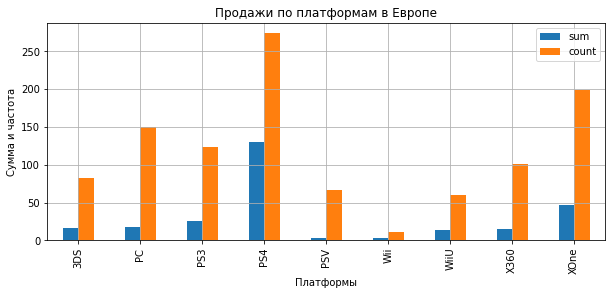

In [49]:
EU_sales.groupby('platform')['EU_sales'].agg(['sum', 'count']).plot(kind = 'bar', figsize = (10,4), grid = True)
plt.title('Продажи по платформам в Европе')
plt.xlabel('Платформы')
plt.ylabel('Сумма и частота')
plt.show()

Ситуация в Европе точно такая же как и в Северной Америке но общая сумма продаж ниже чем в Северной Америке.

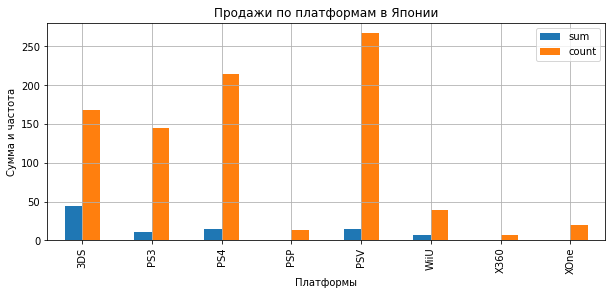

In [50]:
JP_sales.groupby('platform')['JP_sales'].agg(['sum', 'count']).plot(kind = 'bar', figsize = (10,4), grid = True)
plt.title('Продажи по платформам в Японии')
plt.xlabel('Платформы')
plt.ylabel('Сумма и частота')
plt.show()

Что касается Японии то тут ситуация другая. Больше всего было проданно на платформе DS после чего идет PS, PS2 потом SNES и закрывает топ 5 3DS. Но при этом кол-во покупок больше всего у PS2, PS3, PSP и DS и также X360

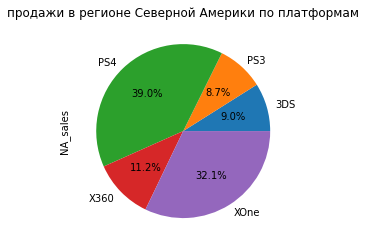

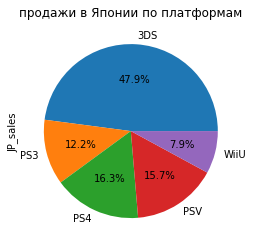

In [51]:
#data_eu = data_year[data_year['platform'].isin(['PS3', 'XOne', 'WiiU', 'PS4', '3DS'])]
#data_eu.groupby('platform')['EU_sales'].agg('sum').plot(kind = 'pie', figsize = (10,4), grid = True, autopct='%1.1f%%')
#plt.title('продажи в регионе Европы по платформам')
#plt.show()
data_na = data_year[data_year['platform'].isin(['PS4', 'PS3', 'X360', 'XOne', '3DS'])]
data_na.groupby('platform')['NA_sales'].agg('sum').plot(kind = 'pie', figsize = (10,4), grid = True, autopct='%1.1f%%')
plt.title('продажи в регионе Северной Америки по платформам')
plt.show()
data_jp = data_year[data_year['platform'].isin(['PS4', 'PS3', '3DS', 'PSV', 'WiiU'])]
data_jp.groupby('platform')['JP_sales'].agg('sum').plot(kind = 'pie', figsize = (10,4), grid = True, autopct='%1.1f%%')
plt.title('продажи в Японии по платформам')
plt.show()


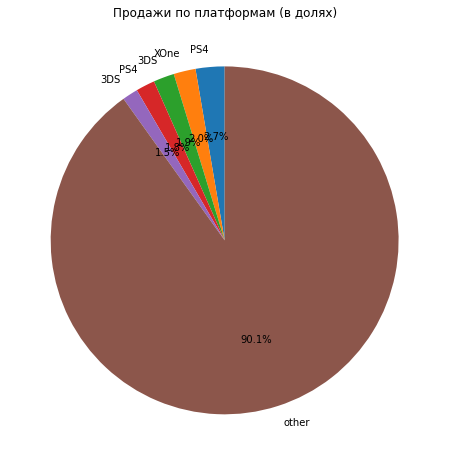

In [52]:
top5 = data_year.sort_values(by='NA_sales', ascending=False).head(5)

other_sales = data_year.loc[data_year['platform'].isin(top5['platform']), 'NA_sales'].sum()
other_row = pd.DataFrame({'platform': ['other'], 'NA_sales': [other_sales]})

combined_data = pd.concat([top5, other_row])

plt.figure(figsize=(8, 8))
plt.pie(combined_data['NA_sales'], labels=combined_data['platform'], autopct='%1.1f%%', startangle=90)
plt.title('Продажи по платформам (в долях)')
plt.show()

,NA_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
Other,31.19


,EU_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
Other,34.76


,JP_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31
Other,0.76


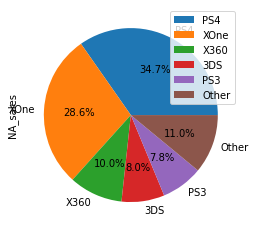

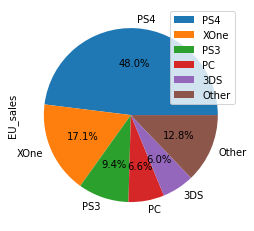

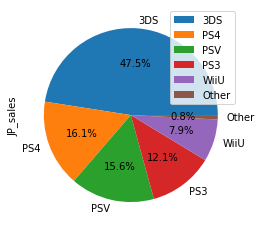

In [53]:
# Комментарий ревьюера 3
temp, target = data_year.copy(), 'platform'
list_region = temp.columns[4:7]
for i in range(3):
    df_ = (temp.groupby(target)[list_region[i]].sum().reset_index().
       sort_values(by=list_region[i], ascending=False)[:5])
    df_ = df_.append({target: 'Other', list_region[i]: temp[list_region[i]].sum() - df_[list_region[i]].sum()}, ignore_index= True)
    df_.index =df_[target]
    df_.drop(target, axis= 1 , inplace= True )
    df_.plot(kind = 'pie', y = list_region[i], subplots = True, autopct='%1.1f%%')
    display(df_)
 

Можем заметить разницу во вкусах разных регионов. Например в Европе больше предпочитают платформу PS2, PS3. В Северной Америке это PS2 и X360, в Японии больше всего используют платформу DS, PS2. Но во всех них есть одна платформа PS2 что говорит нам о том что она самая распространенная платформа относительно других платформ

**2)** В этом шаге мы рассмотрим топ-5 самых популярных жанров. Рассмотрим двумя способами, один столбчатой диаграммой и рассмотрим сумму и кол-во продаж а второй способ в виде пирога и соотнесем с остальными жанрами

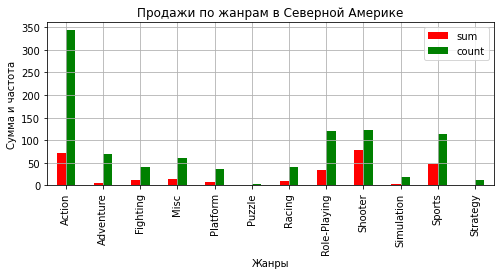

In [54]:
NA_sales.groupby('genre')['NA_sales'].agg(['sum', 'count']).plot(kind = 'bar', figsize = (8,3), grid = True, color = ['red', 'green'])
plt.title('Продажи по жанрам в Северной Америке')
plt.xlabel('Жанры')
plt.ylabel('Сумма и частота')
plt.show()

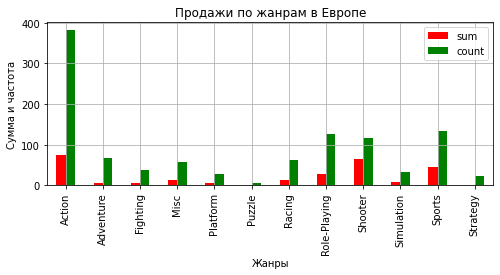

In [55]:
EU_sales.groupby('genre')['EU_sales'].agg(['sum', 'count']).plot(kind = 'bar', figsize = (8,3), grid = True, color = ['red', 'green'])
plt.title('Продажи по жанрам в Европе')
plt.xlabel('Жанры')
plt.ylabel('Сумма и частота')
plt.show()

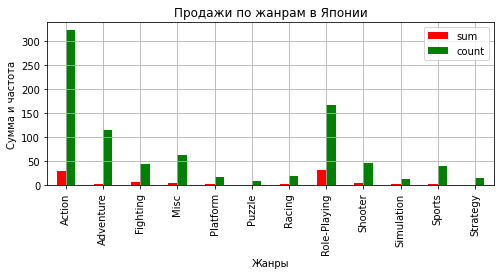

In [56]:
JP_sales.groupby('genre')['JP_sales'].agg(['sum', 'count']).plot(kind = 'bar', figsize = (8,3), grid = True, color = ['red', 'green'])
plt.title('Продажи по жанрам в Японии')
plt.xlabel('Жанры')
plt.ylabel('Сумма и частота')
plt.show()

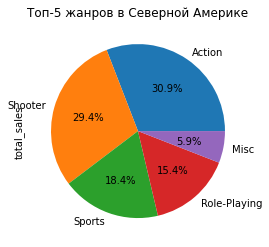

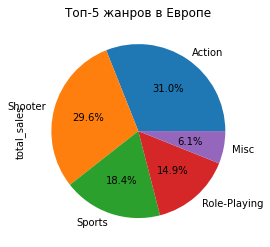

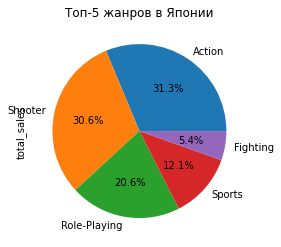

In [57]:
na_genre_pie = NA_sales.groupby('genre')['total_sales'].sum().sort_values(ascending = False)
na_genre_pie = na_genre_pie.head(5)
na_genre_pie.plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Топ-5 жанров в Северной Америке')
plt.show()
eu_genre_pie = EU_sales.groupby('genre')['total_sales'].sum().sort_values(ascending = False)
eu_genre_pie = eu_genre_pie.head(5)
eu_genre_pie.plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Топ-5 жанров в Европе')
plt.show()
jp_genre_pie = JP_sales.groupby('genre')['total_sales'].sum().sort_values(ascending = False)
jp_genre_pie = jp_genre_pie.head(5)
jp_genre_pie.plot(kind = 'pie', autopct='%1.1f%%')
plt.title('Топ-5 жанров в Японии')
plt.show()

**3)** Влияние рейтинга ESRB на продажи в отдельном регионе

In [58]:
data['rating'].unique()

array(['E', '-1', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Видем что есть пропуски в данных, лучше всего поставить заглушки а именно заполнить их каким нибудь значением, в этом случае заполним их 0 

In [3]:
import warnings
warnings.filterwarnings("ignore")
display(NA_sales.head(5))
NA_sales.loc[:, 'rating'] = NA_sales['rating'].fillna(0)
display(NA_sales.head(5))
pd.set_option('chained_assignment', None)
pd.set_option('chained_assignment', None)

NameError: name 'NA_sales' is not defined

In [60]:
na_rating_pivot_table = pd.pivot_table(NA_sales, index='rating', values='NA_sales',
                                        aggfunc='sum').sort_values('NA_sales', ascending=False)
na_rating_pivot_table


,NA_sales
rating,
M,96.42
-1,64.72
E,50.74
T,38.95
E10+,33.23


Можем заметить что игры для всех продаются больше всего после чего идет рейтинг T который означает что это для подростков от 13 и старше, на третьем месте стоит рейтинг M mature от 17 и старше. Мы можем видеть что чем меньше ограничений по игре тем больше продажи по этим играм. Но также большую часть занимает игры без рейтинга ESRB примерно 1.225.840.000 долларов

In [61]:
EU_sales.loc[:, 'rating'] = EU_sales['rating'].fillna(0)
eu_rating_pivot_table = pd.pivot_table(EU_sales, index='rating', values='EU_sales',
                                        aggfunc='sum').sort_values('EU_sales', ascending=False)
na_rating_pivot_table.fillna(0, inplace=True)
eu_rating_pivot_table


,EU_sales
rating,
M,93.44
-1,58.95
E,58.06
T,34.07
E10+,26.16


Сильной разницы с Серерно Американским рынке нет, мы можем лишь заметить разницу между двумя рейтингами M и T у Европейского рынка разница в продажах с Америкой значительная и также продажи игр старше 17 лет продаются лучше чем игры продаваемые подросткам от 13 лет и старше. А также видем что на втором месте стоят заглушки которые мы поставили и оно имеет значительно большую сумму

In [62]:
JP_sales.loc[:, 'rating'] = JP_sales['rating'].fillna(0)
jp_rating_pivot_table = pd.pivot_table(JP_sales, index='rating', values='JP_sales',
                                        aggfunc='sum').sort_values('JP_sales', ascending=False)
jp_rating_pivot_table
pd.set_option('chained_assignment', None)

В Японском рынке ситуация значительно проще так как продажи на этом рынке значительно меньше, игры рейтинга для всех продаются лучше всех но при этом игры без рейтинга стоят на первом месте по продажам(836.740.000 долларов) после чего идут игры с ограничением до 13+, на третьем месте стоит 17+ b после чего идут игры с ограничением для всех старше 10. 

In [63]:
# Комментарий ревьюера
temp = data.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


-1      6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

**ГИПОТЕЗЫ**

В этом этапе мы проведем гипотезы и ответим на следующие вопросы: 

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

В этом этапе мы очистим данные перед проведением гипотез и также разберем и создадим нулевую и альтернативную гипотезу

Перед тем как начать гипотезы мы очистим данные и сделаем срезы по годам(чтобы использовать актуальный период) и по платформе 

In [64]:
xbox_one = data_year.loc[data_year['platform'] == 'XOne']
xbox_one = xbox_one[xbox_one['year_of_release'] > 2013]
xbox_one = xbox_one.dropna()
xbox_one = xbox_one.query('user_score > -1')
xbox_one = pd.DataFrame(xbox_one, columns = ['user_score'])
display(xbox_one.head())
pc_score = data_year.loc[data_year['platform'] == 'PC']
pc_score = pc_score[pc_score['year_of_release'] > 2013]
pc_score = pc_score.dropna()
pc_score = pc_score.query('user_score > -1')
pc_score = pd.DataFrame(pc_score, columns = ['user_score'])
display(pc_score.head())

,user_score
165,7.9
179,5.4
242,6.4
270,6.2
373,4.1


,user_score
458,3.9
1530,5.4
1730,7.9
2303,5.7
2784,5.9


user_score    2.1
dtype: float64

user_score    1.4
dtype: float64

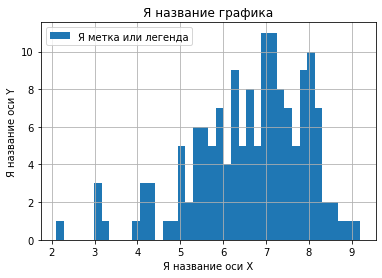

In [65]:
# Комментарий ревьюера 3
display(xbox_one.min(), pc_score.min())
xbox_one.hist(bins=40)
plt.title('Я название графика')
plt.xlabel('Я название оси Х')
plt.ylabel('Я название оси Y')
plt.legend(['Я метка или легенда'])
plt.show()

Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Формерование гипотез:Проверим верная ли гипотеза или нет. В нулевую гипотезу поставим что обе платформы XOne и PC равны и в альтернативную гипотезу что обе платформы не развны. Будем использовать независимый t-test так как у нас две независимые выборки 

Критерии для использования гипотез: Должен быть срез исключительно по жвум жанрам по отдельности и также не должно быть пустых ячеек.

H0: Рейтинги XOne и PC равны

Ha: Рейтинги XOne и PC разные

In [66]:
alpha = 0.05
result = st.ttest_ind(xbox_one, pc_score)
print('P-value:', result.pvalue)
if result.pvalue < alpha:
    print('Средние пользовательские рейтинги платформ Xbox One и PC одинаковые')
else:
    print('Средние пользовательские рейтинги платформ Xbox One и PC различаются.')
    
print('средний рейтинг на платформе XOne:', xbox_one.mean())
print('средний рейтинг на платформе PC:', pc_score.mean())

P-value: [0.12817794]
Средние пользовательские рейтинги платформ Xbox One и PC различаются.
средний рейтинг на платформе XOne: user_score    6.62053
dtype: float64
средний рейтинг на платформе PC: user_score    6.341739
dtype: float64


**ВЫВОД: В этом случае мы отвергаем гипотезу о том что платформа XOne и PC одинаковые по рейтингу пользователей**

Гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Проверим верная ли гипотеза или нет. В нулевую гипотезу поставим что два жанра Action и Sports равны и в альтернативную гипотезу что оба жанра не равны по пользовательскому рейтингу. Будем также использовать независимый t-test так как у нас две независимые выборки от разных жанров

In [67]:
action_data = data_year.loc[data_year['genre'] == 'Action']
action_data = action_data[action_data['year_of_release'] > 2013]
action_data = action_data.dropna()
action_data = action_data.query('user_score > -1')
action_data = pd.DataFrame(action_data, columns = ['user_score'])
display(action_data.head())
sports_data = data_year.loc[data_year['genre'] == 'Sports']
sports_data = sports_data[sports_data['year_of_release'] > 2013]
sports_data = sports_data.dropna()
sports_data = sports_data.query('user_score > -1')
sports_data = pd.DataFrame(sports_data, columns = ['user_score'])
display(sports_data.head())

,user_score
42,8.3
165,7.9
231,8.1
295,6.3
304,4.9


,user_score
77,4.3
94,5.0
143,5.7
314,6.7
417,4.4


Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Формерование гипотез:Проверим верная ли гипотеза или нет. В нулевую гипотезу поставим что два жанра Action и Sports равны и в альтернативную гипотезу что оба жанра не равны по пользовательскому рейтингу. Будем также использовать независимый t-test так как у нас две независимые выборки от разных жанров. 

Критерии для использования гипотез: Должен быть срез исключительно по двум жанрам по отдельности и также не должно быть пустых ячеек.

H0: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Ha: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [68]:
alpha = 0.05
result = st.ttest_ind(action_data, sports_data)
print('P-value:', result.pvalue)
if result.pvalue < alpha:
    print('Средние пользовательские рейтинги жанров Action и Sports одинаковые.')
else:
    print('Средние пользовательские рейтинги жанров Action и Sports различаются.')
    
print('средний рейтинг жанра Action:', xbox_one.mean())
print('средний рейтинг жанра Sports:', pc_score.mean())

P-value: [4.0540896e-10]
Средние пользовательские рейтинги жанров Action и Sports одинаковые.
средний рейтинг жанра Action: user_score    6.62053
dtype: float64
средний рейтинг жанра Sports: user_score    6.341739
dtype: float64


**ВЫВОД: По итогам гипотезы мы принимаем гипотезу о том что жанры Action и Sports одинаковые по рейтингу пользователей**

В этом случае мы отвергаем что жанр Action и Sports разные

**Вывод:**

В этом проекте мы в первую очередь выгрузили данные после чего провели краткий просмотр и общую информацию по данным. Очистили данные от неявных и явных дубликатов. Также проработали со столбцом годов так как он был типа float мы переделали на int после чего мы очистели столбец в годами от нулевых значений(отсутсвующих значений). Описали причины по которым происзошли пропуски в данных. Создали новый столбец по сумарным продажам всех регионов. 

**Иследовательский анализ данных**

В этом этапе в первую очередь мы рассмотрели сколько игр выпускалось в разные годы и проверили за какой период стоит расматривать данные а за какой не стоит. После чего рассмотрели как менялись продажи по платформам из самых прибыльных платформ по всем регионам. После этого рассмотрели данные за акутальный период а именно за 3 года. Просмотрели вопрос 'Какие платформы лидируют по продажам, растут или падают?' определили это периодем и также просмотрели как за этот период менялась общая выручка. Построили график «ящик с усами» по глобальным продажам игр в разбивке по платформам. с помощью чего увидели няглядно разницу между топ 6 платформами. Также просмотрели как отзывы критиков и польвователей влияют на продажи игр по платформам а также по жанрам.

**Партрет каждого из регионов по платформам и жанрам а также просмотр как рейтинг ESRB влияет на продажи**

Визуализировали и посмотрили таблицу самых популярных платформ и жанрам для того чтобы это сделать потребовалось сделать срез данных по топ 5 платформ используя groupby

**Гипотезы**

Ответили на два главных вопроса это:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Рассмотрели каким способом лучше всего проводить гипотезы и как лучше всего делать врез по каждым жанрам и платформ


ВЫВОД: Мы можем выделить две основные платформы которые используются во всех регионах и очень часто PS4 и XOne мы также могли бы выделить PS3 и X360 но их пик уже прошел и щас они идут только на спад, также что касается жанров мы можем выделить один стабильный и сильно ростущий жанр Шутры (Shooter) и также жанр Action. Если мы посмотрим на общие продажи то жанр Action намного больше заработал но он менее стабильный относительно жанра Shooter. Что касается Американского рынка и рейтинга ESRB то мы можем сразу сказать что игры с рейтингом для всех и тинейджер продаются относительно лучше остальных игр с рейтингом 18+. Отзывы пользователей и критиков. Что касается отзывов пользователей то они никак не реагируют на продажи игр но при этом отзывы критиков хоть и не большую но имеют корреляцию с продажами, так что лучше всего обращать внимание на оценку критиков нежели пользователей